In [1]:
from networkx.readwrite import json_graph
import networkx as nx
import json
import matplotlib.pyplot as plt
import community as community_louvain

In [2]:
with open("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2017/Graph.json", 'rt') as gr:
    g = json.load(gr)

In [3]:
G = json_graph.node_link_graph(g)

In [4]:
print(type(G))

<class 'networkx.classes.graph.Graph'>


In [5]:
# Print number of nodes and edges

In [6]:
print("Number of Nodes: ", len(G.nodes()))
print("Number of Edges: ", len(G.edges()))

Number of Nodes:  2955
Number of Edges:  1493110


In [7]:
#Degree calculation

In [8]:
for node_temp in G.nodes():
    wt = 0
    deg = 0
    for nbr, eattr in G.adj[node_temp].items():
        wt = wt + eattr['weight']
        deg += 1
    G.nodes[node_temp]['deg_wt'] = wt
    G.nodes[node_temp]['deg'] = deg

In [9]:
#Degree distrivution

Text(0, 0.5, 'Frequency')

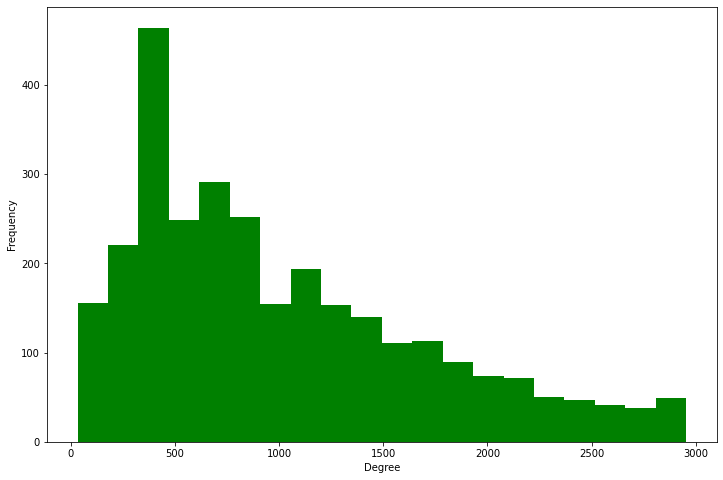

In [10]:
degree_freq = []
for nod in G.nodes:
    degree_freq.append(G.nodes[nod]['deg'])

degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8))
plt.hist(degree_freq, color='green', bins=20)
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [11]:
# Weight Distribution

Text(0, 0.5, 'Frequency')

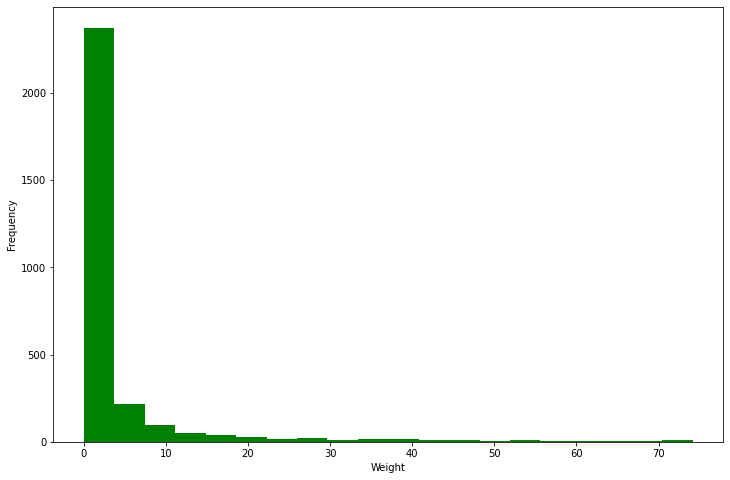

In [12]:
weight_freq = []
for nod in G.nodes:
    weight_freq.append(G.nodes[nod]['deg_wt'])

wt = range(len(weight_freq))
plt.figure(figsize=(12, 8))
plt.hist(weight_freq, color='green', bins=20)
plt.xlabel('Weight')
plt.ylabel('Frequency')

In [13]:
# Degree statistics

In [14]:
# Average degree
print(sum(degree_freq)/len(G.nodes))
print(min(degree_freq))
print(max(degree_freq))

1010.565143824027
32
2954


In [15]:
# Weight Statistics
print(sum(weight_freq)/len(G.nodes))
print(min(weight_freq))
print(max(weight_freq))

4.0447610035253865
0.0011159403265593806
74.15523317279437


In [16]:
# sort nodes based on degree

In [17]:
degree_freq = {}
for nod in G.nodes:
    degree_freq[nod] = G.nodes[nod]['deg']
sorted_degree = dict(sorted(degree_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_degree)

{'document': 2954, 'location': 2954, 'name': 2954, 'window': 2954, 'var': 2954, 'init': 2951, 'null': 2950, 'length': 2948, 'top': 2944, 'parent': 2944, 'self': 2944, 'frames': 2942, 'opener': 2942, 'push': 2929, 'type': 2928, 'replace': 2917, 'addEventListener': 2908, 'prototype': 2908, 'Math': 2907, 'setTimeout': 2906, 'undefined': 2906, 'call': 2902, 'function': 2894, 'id': 2891, 'src': 2887, 'string': 2882, 'join': 2880, 'Date': 2875, 'Array': 2872, 'value': 2870, 'arguments': 2870, 'object': 2868, 'style': 2867, 'width': 2864, 'slice': 2863, 'data': 2862, 'height': 2859, 'toString': 2859, 'match': 2855, 'in': 2853, 'hasOwnProperty': 2851, 'void': 2849, 'delete': 2842, 'apply': 2837, 'readyState': 2831, 'Object': 2830, 'instanceof': 2822, 'JSON': 2812, 'createElement': 2809, 'error': 2803, 'number': 2801, 'splice': 2796, 'target': 2794, 'open': 2791, 'navigator': 2790, 'removeEventListener': 2788, 'String': 2787, 'get': 2786, 'url': 2785, 'console': 2781, 'onload': 2779, 'parse': 2

In [18]:
# sort nodes based on weight

In [19]:
weight_freq = {}
for nod in G.nodes:
    weight_freq[nod] = G.nodes[nod]['deg_wt']
sorted_weight = dict(sorted(weight_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_weight)

{'document': 74.15523317279437, 'var': 74.1312404557734, 'window': 74.10269587689407, 'location': 74.06469517208949, 'name': 74.01891225184987, 'top': 73.44851991072456, 'self': 72.88805356513544, 'parent': 71.66442499706308, 'opener': 71.46097145542096, 'frames': 71.43413015388208, 'init': 71.12204863150465, 'createElement': 70.46261599906013, 'length': 70.23566897685899, 'src': 69.34879008575066, 'null': 69.30588511688003, 'replace': 65.27105603195056, 'push': 64.8561024315749, 'type': 64.81927640079833, 'getElementsByTagName': 64.09156584047865, 'Date': 62.958622107364796, 'Math': 62.25093973922207, 'id': 61.43063549864885, 'call': 60.376424292258655, 'join': 60.33413602725206, 'appendChild': 59.607923176318636, 'body': 59.47298249735698, 'parentNode': 59.04916010807014, 'undefined': 58.70779983554534, 'setTimeout': 58.575619640549405, 'addEventListener': 57.940062257723206, 'prototype': 57.06278632679415, 'style': 57.05890990250165, 'toString': 56.42511453071733, 'navigator': 55.56

In [20]:
# Check whether the graph is connected

In [21]:
nx.is_connected(G)

True

In [22]:
# Clustering Coefficient

In [23]:
nx.average_clustering(G)

0.8221160978863227

In [24]:
# average_shortest_path_length

In [25]:
nx.average_shortest_path_length(G)

1.6578994096736537

In [26]:
#Lovain methof

In [27]:
partition = community_louvain.best_partition(G, resolution=0.88, weight='weight')

In [28]:
# number of partinions

In [29]:
num_of_partitions = len(set(partition.values()))
print(num_of_partitions)

19


In [30]:
api_hash_fract = {}
for key, value in partition.items():
    api_hash_fract[key] = value
louvain_clusters = {}
for i in range(num_of_partitions):
    clust = []
    for key, value in api_hash_fract.items():
        if value == i:
            clust.append(key)
    louvain_clusters[i] = clust
for i in range(num_of_partitions):
    print(len(louvain_clusters[i]))

98
114
109
91
2
1
126
4
403
3
1
3
60
3
33
155
2
1745
2


In [31]:
with open("Lovain_clusters.json", 'w') as l:
    json.dump(louvain_clusters,l, indent=4)
